# <center> 1- Classification avec les données Titanic </center>

**Sources :** 
- HARRISON Matt, *Machine learning, les fondamentaux : exploiter des données structurées en Python*, First, Paris, 2020, p.9-32.
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://www.kaggle.com/code/minsukheo/titanic-solution-with-sklearn-classifiers/notebook
- Kaggle dataset : https://www.kaggle.com/c/titanic/data


## Objectif :
Exploiter les informations pour prédire la survie d'un passager du célèbre naufrage.

Il s'agit d'une **classification** car il faut prédire des labels pour la survie : vivante/décédée.

--- 


## Importations      

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, preprocessing, tree, model_selection
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
# pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import LearningCurve

## Chargement des données

In [4]:
# source dataset : https://github.com/mattharrison/datasets/blob/master/data/titanic3.xls

df = pd.read_excel("titanic3.xls")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Description des colonnes

In [5]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

- **pclass :** Classe du passage (1, 2 ou 3)
- **survival :** : Survivant (0=Non, 1=Oui)
- **sibsp :** Nb de frères/soeurs/épouse à bord
- **parch :** Nb de parents/enfants à bord
- **ticket :** N° du billet
- **fare :** Tarif du billet
- **embarked :** Port d'embarquement (C=Cherbourg, Q=Queenstown, S=Southampton)
- **boat :** Canot de sauvetage
- **body :** N° d'identification du corps
- **home.dest :** Domiciliation/destination

## Informations sur le dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
# Description (statistiques résumées uniquement sur les colonnes numériques)
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
# Connaître le nb de lignes/colonnes
df.shape

(1309, 14)

In [9]:
# type des colonnes
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Librairie **pandas-profiling**

Permet de générer un rapport de profil contenant les types de toutes les colonnes et permettant d'accéder aux détails statistiques au niveau des quantiles, aux descriptions, à des histogrammes, et aux valeurs les plus fréquentes et extrêmes.

In [10]:
# pip install pandas-profiling
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Nettoyage des données

### Traitement des données manquantes

In [11]:
# nombre de valeurs manquantes
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
# pourcentage de valeurs manquantes
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [13]:
# connaître le nombre de valeurs dans une colonne de type catégorielle
# l'option dropna=False permet de voir également les NaN
df.sex.value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [14]:
df.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

### Suppression des colonnes inutiles

In [15]:
df = df.drop(columns=["name", "ticket", "home.dest", "boat", "body", "cabin"])

In [16]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


Les colonnes 'sex' et 'embarked' contiennent du texte. On peut utiliser la fonction `get_dummies` pour les transformer en chiffres. 

In [17]:
df = pd.get_dummies(df)
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,1


Les colonnes 'sex_male' et 'sex_female' sont en corrélation inverse parfaite : ces colonnes peuvent être supprimées. En effet, cette colinéarité peut avoir un impact négatif sur la pondération des caractéristiques et les coefficients dans certains modèles.

In [18]:
# suppression d'une colonne
df = df.drop(columns='sex_male')

In [19]:
# possible d'utiliser le paramètres 'drop_frist=True' lors du get_dummies :
df = pd.get_dummies(df, drop_first=True)

In [20]:
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,1
3,1,0,30.0000,1,2,151.5500,0,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,1


In [21]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

## Création de X et y

In [22]:
y = df.survived
X = df.drop(columns="survived")

## Sélection d'un échantillon de données

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

## Imputation des données

On impute les valeurs manquantes sur le jeu d'entraînement.

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute

num_cols = ["pclass", "age", "sibsp", "parch", "fare","sex_female"]

imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])

X_train.loc[:, num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed

In [26]:
# imputation avec la médiane
meds = X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

## Normalisation des données

Consiste à convertir les données pour que la valeur moyenne soit égale à zéro, avec un écart-type à 1. Evite ainsi au modèle d'être perturbé par les variables exprimées avec une plus grande échelle que d'autres. 

In [27]:
cols = ["pclass","age","sibsp", "parch","fare","sex_female","embarked_C","embarked_Q","embarked_S"]
sca = preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = sca.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

## Création du modèle de référence

In [28]:
from sklearn.dummy import DummyClassifier

modele = DummyClassifier()
modele.fit(X_train, y_train)

# accuracy
modele.score(X_test, y_test)

0.5699745547073791

## Utilisation de plusieurs algorithmes différents avec XGBoost

pip install XGBoost

In [29]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [30]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [31]:
for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits=10, shuffle=True, random_state=42
    )
    s = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyClassifier         AUC: 0.500 STD: 0.00
LogisticRegression      AUC: 0.841 STD: 0.04
DecisionTreeClassifier  AUC: 0.760 STD: 0.02
KNeighborsClassifier    AUC: 0.834 STD: 0.03
GaussianNB              AUC: 0.804 STD: 0.04
SVC                     AUC: 0.838 STD: 0.03
RandomForestClassifier  AUC: 0.849 STD: 0.02
XGBClassifier           AUC: 0.852 STD: 0.02


## Stacking (empilement)
Prend les prédictions produites par d'autres modèles pour faire sa propre prédiction d'une cible ou d'un label. On se sert des résultats des autres modèles en les combinant pour voir si le classlifieur à empilement donne de meilleurs résultats.

In [84]:
# pip install mlxtend
from mlxtend.classifier import StackingClassifier

clfs = [
    x()
    for x in [
        LogisticRegression,
        DecisionTreeClassifier,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier,
    ]
]
stack = StackingClassifier(
    classifiers=clfs,
    meta_classifier=LogisticRegression(),
)
kfold = model_selection.KFold(
    n_splits=10, random_state=42, shuffle=True
)
s = model_selection.cross_val_score(
    stack, X, y, scoring="roc_auc", cv=kfold
)
print(
    f"{stack.__class__.__name__}  "
    f"AUC: {s.mean():.3f}  STD: {s.std():.2f}"
)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier  AUC: 0.786  STD: 0.03


## Création du modèle : Random Forest

In [32]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
# entraînement du modèle sur les données de train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation du modèle

Le modèle va alors recevoir les données test pour voir comment il sait généraliser avec des données qu'il ne connaît pas encore. Nous nous servons de la méthode `.score` du classifieur pour récupérer la moyenne de l'exactitude (*accuracy*) de prédiction.

In [33]:
rf.score(X_test, y_test)

0.7964376590330788

In [35]:
import sklearn.metrics as metrics
# précision
metrics.precision_score(y_test, rf.predict(X_test))

0.8027210884353742

## Optimisation par les hyperparamètres

Permet d'influer sur les performances.

La classe **GridSearchCV** de **sklearn** permet d'évaluer un modèle en essayant plusieurs combinaisons de paramètres et en renvoyant les résultats. Nous pouvons nous servir de ces paramètres pour procéder à l'instanciation de la classe du modèle :

In [36]:
rf4 = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1
).fit(X_train, y_train)

print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [37]:
rf5 = ensemble.RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 0.1,
        "n_estimators": 200,
        "random_state": 42,
    }
)
rf5.fit(X_train, y_train)
rf5.score(X_test, y_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7175572519083969

## Matrices de confusion

Permet de vérifier la qualité d'un modèle en visualisant les classifications correctes ainsi que les faux positifs et les faux négatifs.

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[216,   8],
       [103,  66]], dtype=int64)

C:\Users\PC\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


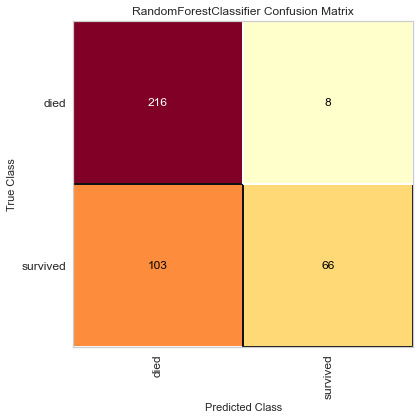

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf5,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Courbe ROC (**Receiver Operating Characteristic)

Correspond à la fonction d'efficacité du récepteur : c'est un outil fréquement utilisé pour évaluer des classifieurs.

In [40]:
y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6774091293322063

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8405268824697465

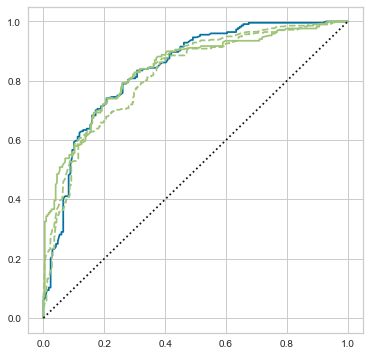

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(rf5)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
# roc_viz.poof()
# sauvegarder l'image
#fig.savefig("images/mlpr_0305.png")

## Courbe d'apprentissage

Permet de vérifier que vous disposez d'assez de données d'entraînement. Le principe est d'entraîner le modèle en lui fournissant une proportion de plus en plus importante du volume de données et en mesurant le score. Si le score de validation croisée ne cesse d'augmenter, c'est qu'il faut sans doute rassembler un plus grand volume de données.

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

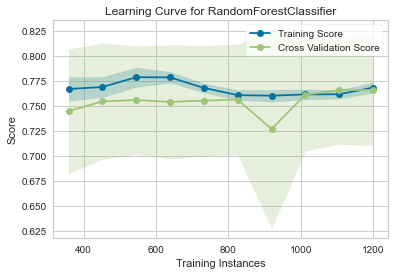

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [105]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,)

lc_viz.fit(X, y)
lc_viz.poof()

## Déploiement du modèle

Le module **pickle** de Python permet de rendre persistants les modèles et de les charger. Une fois que nous avons un modèle, nous pouvons appeler la méthode `.predict` pour générer un résultat de classification ou de régression.

In [42]:
import pickle

pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6774091293322063

---